## Notebook for data acquisition and analysis
### Physics 108, Winter 2017-18
#### Authors: Alex Rickman, Connor Holland, Joey Murphy

In [2]:
# import nidaqmx as ni
# import nidaqmx.system
import numpy as np
import visa
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# print("Information about the NI device we're using (6014) and the driver 
#       that's installed on the lab machine for it:\n")
# system = nidaqmx.system.System.local()
# print(system.driver_version)

# for device in system.devices:
#     print(device)

# voltage = []
# with nidaqmx.Task() as task:
    
#     task.ai_channels.add_ai_voltage_chan("6014_Dev1/ai0")
    
#     for t in range(50):
#         voltage.append(task.read()) # number_of_samples_per_channel=1
#         time.sleep(0.01)
        
# print(voltage)0
# plt.plot(t, voltage)
# plt.show()

# nidaqmx.system.PhysicalChannel('Dev1/ai0')

# from nidaqmx.constants import LineGrouping
# with nidaqmx.Task() as task:
#     task.di_channels.add_di_chan("6014_Dev1/port0/line0:1", line_grouping=LineGrouping.CHAN_PER_LINE)
#     print(task.read(number_of_samples_per_channel=2))

## Now using GPIB connection instead of NI DAQ system

In [20]:
rm = visa.ResourceManager()
instr_ref    = rm.open_resource('GPIB0::2::INSTR')
instr_signal = rm.open_resource('GPIB0::3::INSTR')

In [18]:
time_start = time.perf_counter()
meas_time = 10 # In seconds

t_ref = []
t_signal = []
voltage_ref = []
voltage_signal = []

while time.perf_counter() <= time_start + meas_time:
    t_ref.append(time.perf_counter())
    voltage_ref.append(float(instr_ref.query('MEAS:VOLT:DC?')))
    
    t_signal.append(time.perf_counter())
    voltage_signal.append(float(instr_signal.query('MEAS:VOLT:DC?')))

# Set measurement start time to zero. Convert lists to numpy arrays so they're easier to work with
t_ref = np.asarray(t_ref) - time_start
t_signal = np.asarray(t_signal) - time_start
voltage_ref = np.asarray(voltage_ref)
voltage_signal = np.asarray(voltage_signal)

# Zip the data together so it's in the format [(t_0, v_0), (t_1 , v_1), ..., (t_N, v_N)]
data_ref = np.array(list(zip(t_ref, voltage_ref)))
data_signal = np.array(list(zip(t_signal, voltage_signal)))

timestr = time.strftime("%m_%d_%Y-%H_%M_%S")
# Save the data to .txt files
np.savetxt('data/timestr/ref.txt'.format(timestr), data_ref)
np.savetxt('data/timestr/signal.txt'.format(timestr), data_signal)

In [33]:
# Use this cell to load data from a file if you want to do postprocessing on it
# Uncomment and change variable/file names if needed
# t_top, voltage_top = np.loadtxt('data_top_0.txt', unpack=True)
# t_bottom, voltage_bottom = np.loadtxt('data_bottom_0.txt', unpack=True)

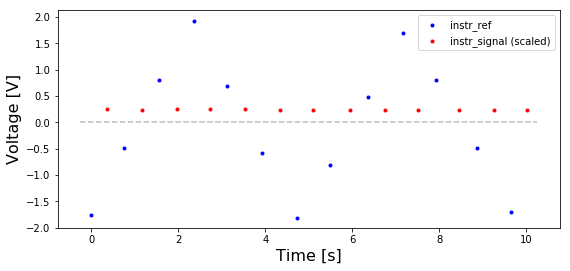

In [19]:
# Set based on the Volts/Div scaling on channel 2 of the scope so that our signal and input are similar scale for plotting
SCOPE_SCALING = 1.0

fig, ax = plt.subplots(figsize=(9,4))
ax.scatter(t_ref, voltage_ref, marker='.', color='blue', label='instr_ref')
ax.scatter(t_signal, voltage_signal, marker='.', color='red', label='instr_signal (scaled)')

# Reference line at 0 Volts
ax.plot(np.linspace(-0.25, meas_time + 0.25, 100), np.zeros(100), '--', color='gray', alpha=0.5)

ax.set_xlabel('Time [s]', fontsize=16)
ax.set_ylabel('Voltage [V]', fontsize=16)
ax.legend()

plt.show()